# Recap Linear Regression

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importamos-librerías" data-toc-modified-id="Importamos-librerías-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importamos librerías</a></span></li><li><span><a href="#Configuraciones-para-poner-mono-el-plot-de-seaborn" data-toc-modified-id="Configuraciones-para-poner-mono-el-plot-de-seaborn-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Configuraciones para poner mono el plot de seaborn</a></span></li><li><span><a href="#¿Cuál-es-la-gracia-del-regplot?" data-toc-modified-id="¿Cuál-es-la-gracia-del-regplot?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>¿Cuál es la gracia del regplot?</a></span></li></ul></div>

## Importamos librerías

In [10]:
import pandas as pd
import numpy as np
#Visualización
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns

# Librerías de modelado
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np

In [7]:
# Voy a generar datos de horas de estudio y notas.
beta_0 = 12
beta_1 =  0.08
num_points = 100
X = np.random.normal(600, 150, num_points) # Horas de estudio

# Notas...
y = beta_0 + (beta_1 * X) + np.random.normal(loc=0, scale=5, size=num_points)
data = pd.DataFrame({'grade': y,
                     'hours': X})

In [8]:
data

,grade,hours
0,53.194171,621.650334
1,75.825787,847.469624
2,65.747192,697.349760
3,54.002627,602.705086
4,52.364372,480.298098
...,...,...
95,47.778960,467.329369
96,62.449212,635.101839
97,67.266568,666.877527
98,70.602891,677.379521


In [16]:
data["prediction_1"] = 0.1 * data.hours

In [17]:
data.head()

,grade,hours,prediction_1
0,53.194171,621.650334,62.165033
1,75.825787,847.469624,84.746962
2,65.747192,697.349760,69.734976
3,54.002627,602.705086,60.270509
4,52.364372,480.298098,48.029810


## Configuraciones para poner mono el plot de seaborn

In [11]:
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

## ¿Cuál es la gracia del regplot?

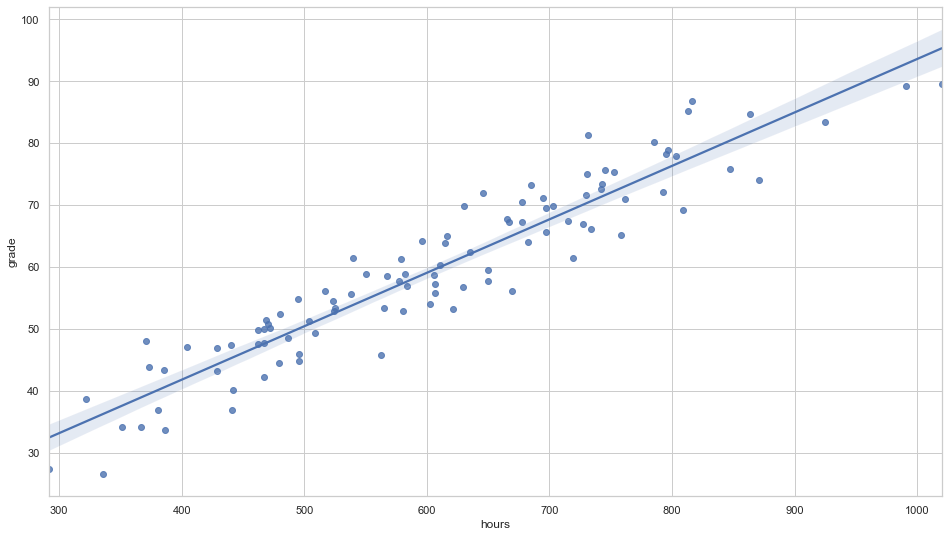

In [13]:
sns.regplot(x='hours', y='grade', data=data);

In [15]:
results = smf.ols('grade ~ hours', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     772.8
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           2.78e-48
Time:                        10:31:31   Log-Likelihood:                -296.85
No. Observations:                 100   AIC:                             597.7
Df Residuals:                      98   BIC:                             602.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3017      1.938      3.768      0.000       3.456      11.147
hours          0.0863      0.003     27.800      0.000       0.080       0.092
==============================================================================
Omnibus:                        2.796   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                1.877
Skew:                          -0.115   Prob(JB):                        0.391
Kurtosis:                       2.369   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""